# **The fifth in-class-exercise (40 points in total, 11/11/2021)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The dataset can be download from here: https://github.com/unt-iialab/info5731_spring2021/blob/main/class_exercises/exercise09_datacollection.zip. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

In [1]:
# Write your code here
# read dataset
import pandas as pd
train_data = pd.read_csv('stsa-train.txt', sep = 'delimiter=', header = None, names = ['review'])
train_data = train_data['review'].str.split(' ', 1, expand = True)
train_data.columns = ['sentiment', 'review']

test_data = pd.read_csv('stsa-test.txt', sep = 'delimiter=', header = None, names = ['review'])
test_data = test_data['review'].str.split(' ', 1, expand = True)
test_data.columns = ['sentiment', 'review']



<ipython-input-1-55eb1155bfc9>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data = pd.read_csv('stsa-train.txt', sep = 'delimiter=', header = None, names = ['review'])
<ipython-input-1-55eb1155bfc9>:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data = pd.read_csv('stsa-test.txt', sep = 'delimiter=', header = None, names = ['review'])


In [2]:
train_data.head()

,sentiment,review
0,1,"a stirring , funny and finally transporting re..."
1,0,apparently reassembled from the cutting-room f...
2,0,they presume their audience wo n't sit still f...
3,1,this is a visually stunning rumination on love...
4,1,jonathan parker 's bartleby should have been t...


In [3]:
test_data.head()

,sentiment,review
0,0,"no movement , no yuks , not much of anything ."
1,0,"a gob of drivel so sickly sweet , even the eag..."
2,0,"gangs of new york is an unapologetic mess , wh..."
3,0,"we never really feel involved with the story ,..."
4,1,this is one of polanski 's best films .


In [4]:
import nltk
import re
import string

from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')
stopword = stopwords.words('english')
from nltk.stem import WordNetLemmatizer
wl = WordNetLemmatizer()

def data_cleaning(text):
  text = "".join([word.lower() for word in text if word not in string.punctuation])
  text = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", text)
  tokens = re.split('\W+',text)
  text = [wl.lemmatize(word) for word in tokens if word not in stopword]
  return text

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ttp0037\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ttp0037\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# Converting train_data into numerical usinf TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vector = TfidfVectorizer(analyzer = data_cleaning)
X_train_tfidf = tfidf_vector.fit_transform(train_data['review'])
print(X_train_tfidf.shape)

# saving the td-idf values in a dataframe
X_train_tfidf_df=pd.DataFrame(X_train_tfidf.toarray())
X_train_tfidf_df.columns=tfidf_vector.get_feature_names()
X_train_tfidf_df.head()

(6920, 13343)


,,100minute,103minute,10course,10th,10thgrade,10year,10yearold,112minute,12,...,ziyi,zoe,zombie,zombieland,zone,zoning,zoom,zwick,zzzzzzzzz,élan
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.048154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.029784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.049596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.048782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Converting test_data into numerical usinf TF-IDF
X_test_tfidf = tfidf_vector.fit_transform(test_data['review'])
print(X_test_tfidf.shape)

(1821, 6357)


In [7]:
!pip3 install xgboost

In [8]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, StratifiedKFold
from xgboost import XGBClassifier
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt

In [9]:
# machine learning algorithms

mnb = MultinomialNB()
svm = LinearSVC()
knn = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()

In [10]:
# create training and testing vars (80% train and 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf_df, train_data['sentiment'].values, test_size = 0.2, random_state = 42)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(5536, 13343) (5536,)
(1384, 13343) (1384,)


### MultinomialNB

In [11]:
# fit a model on the training data
model_mnb = mnb.fit(X_train, y_train)
prediction_mnb = model_mnb.predict(X_test)
print('Accuracy %s' % accuracy_score(prediction_mnb,y_test))
print(classification_report(y_test,prediction_mnb))

Accuracy 0.7955202312138728
              precision    recall  f1-score   support

           0       0.85      0.70      0.77       671
           1       0.76      0.88      0.82       713

    accuracy                           0.80      1384
   macro avg       0.80      0.79      0.79      1384
weighted avg       0.80      0.80      0.79      1384



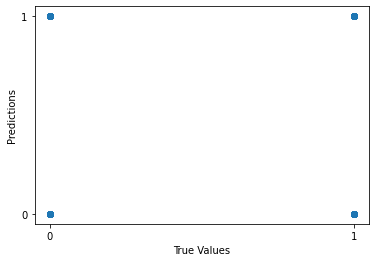

In [13]:
# plot the model
plt.scatter(y_test, prediction_mnb)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [14]:
# print the accuracy score
scores = cross_val_score(mnb, X_test, y_test, cv=10)
print("MultinominalNB:",scores.mean())

MultinominalNB: 0.7247054530288813


### SVM

In [15]:
# fit a model on the training data
model_svm = svm.fit(X_train,y_train)
prediction_svm = model_svm.predict(X_test)
print('Accuracy %s' % accuracy_score(prediction_svm, y_test))
print(classification_report(y_test, prediction_svm))

Accuracy 0.791907514450867
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       671
           1       0.78      0.83      0.80       713

    accuracy                           0.79      1384
   macro avg       0.79      0.79      0.79      1384
weighted avg       0.79      0.79      0.79      1384



In [16]:
# print the accuracy score
scores = cross_val_score(svm, X_test, y_test, cv=10)
print("SVM:", scores.mean())

SVM: 0.7348034615785632


### KNN

In [17]:
# fit a model on the training data
model_knn = knn.fit(X_train,y_train)
prediction_knn = model_knn.predict(X_test)
print('Accuracy %s' % accuracy_score(prediction_knn, y_test))
print(classification_report(y_test, prediction_knn))

Accuracy 0.740606936416185
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       671
           1       0.74      0.77      0.75       713

    accuracy                           0.74      1384
   macro avg       0.74      0.74      0.74      1384
weighted avg       0.74      0.74      0.74      1384



In [18]:
# print the accuracy score
scores = cross_val_score(knn, X_test, y_test, cv=10)
print("KNN:", scores.mean())

KNN: 0.6675737670732979


### Decision Tree

In [19]:
# fit a model on the training data
model_dt = dt.fit(X_train,y_train)
prediction_dt = model_dt.predict(X_test)
print('Accuracy %s' % accuracy_score(prediction_dt, y_test))
print(classification_report(y_test, prediction_dt))

Accuracy 0.653179190751445
              precision    recall  f1-score   support

           0       0.65      0.61      0.63       671
           1       0.65      0.70      0.67       713

    accuracy                           0.65      1384
   macro avg       0.65      0.65      0.65      1384
weighted avg       0.65      0.65      0.65      1384



In [20]:
# print the accuracy score
scores = cross_val_score(dt, X_test, y_test, cv=10)
print("Decision Tree:", scores.mean())

Decision Tree: 0.6177458033573142


### Random Forest

In [21]:
# fit a model on the training data
model_rf = rf.fit(X_train,y_train)
prediction_rf = model_rf.predict(X_test)
print('Accuracy %s' % accuracy_score(prediction_rf, y_test))
print(classification_report(y_test, prediction_rf))

Accuracy 0.7420520231213873
              precision    recall  f1-score   support

           0       0.78      0.65      0.71       671
           1       0.72      0.82      0.77       713

    accuracy                           0.74      1384
   macro avg       0.75      0.74      0.74      1384
weighted avg       0.75      0.74      0.74      1384



In [22]:
# print the accuracy score
scores = cross_val_score(rf, X_test, y_test, cv=10)
print("Random Forest:", scores.mean())

Random Forest: 0.681274111145866


### XGBoost

In [23]:
# fit a model on the training data
model_xgb = xgb.fit(X_train,y_train)
prediction_xgb = model_xgb.predict(X_test)
print('Accuracy %s' % accuracy_score(prediction_xgb, y_test))
print(classification_report(y_test, prediction_xgb))

C:\Users\ttp0037\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:28:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy 0.7182080924855492
              precision    recall  f1-score   support

           0       0.77      0.59      0.67       671
           1       0.69      0.84      0.75       713

    accuracy                           0.72      1384
   macro avg       0.73      0.71      0.71      1384
weighted avg       0.73      0.72      0.71      1384



In [24]:
# print the accuracy score
scores = cross_val_score(xgb, X_test, y_test, cv=10)
print("XGBoost:", scores.mean())

C:\Users\ttp0037\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:31:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\ttp0037\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:31:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\ttp0037\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:31:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\ttp0037\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:32:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\ttp0037\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:32:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\ttp0037\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\ttp0037\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\ttp0037\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\ttp0037\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:34:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\ttp0037\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:34:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost: 0.6618027317276612


(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 

### read dataset

In [25]:
#Write your code here.
import pandas as pd

amazon_review = pd.read_csv('Amazon_Unlocked_Mobile.csv')
amazon_review.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


### clean data

In [29]:
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

In [31]:
amazon_review['Reviews'] = amazon_review['Reviews'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
amazon_review['Reviews'] = amazon_review['Reviews'].str.replace('[^\w\s]','')

stop = stopwords.words('english')
amazon_review['Reviews'] = amazon_review['Reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

nltk.download('wordnet')
amazon_review['Reviews'] = amazon_review['Reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
amazon_review['Reviews'].head()

<ipython-input-31-11b4241d39ad>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  amazon_review['Reviews'] = amazon_review['Reviews'].str.replace('[^\w\s]','')
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ttp0037\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    feel lucky found used phone u used hard phone ...
1    nice phone nice grade pantach revue clean set ...
2                                              pleased
3          work good go slow sometimes good phone love
4    great phone replace lost phone thing volume bu...
Name: Reviews, dtype: object

In one paragraph, please compare K means, DBSCAN and Hierarchical clustering.

In [2]:
#You can write you answer here. (No code needed)


